# Week 3 – FRED Targets EDA (`eda_targets.ipynb`)

This notebook does a focused exploratory analysis for the macro **targets**:

- CPI (Consumer Price Index)  
- GDP (Gross Domestic Product)  
- Fed Funds Rate (FEDFUNDS / `Fed_Funds_Rate` in the CSV)

Requirements covered:

1. Plot time series for CPI, GDP, Fed Funds (levels & monthly % change).  
2. Show autocorrelation (ACF/PACF) and simple monthly seasonality diagnostics.  
3. Correlation heatmap among regressors and targets (after alignment).  
4. Quick data issue dashboard (missingness by column, basic outlier flags).  
5. Export key visuals to `docs/figures/week3/` for use in the README.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from scipy.stats import zscore

# For ACF / PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Output directory
output_dir = '../docs/figures/week3'
os.makedirs(output_dir, exist_ok=True)
print(f'Figures will be saved in: {output_dir}')

Figures will be saved in: ../docs/figures/week3


In [33]:
# Load FRED macro data (adjust path if needed)
data_path = '../fred_macro_data_20251107.csv'

df = pd.read_csv(data_path)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

print('Shape:', df.shape)
print('Date range:', df.index.min(), 'to', df.index.max())
print('Columns:', list(df.columns))

display(df.head())

print('\nMissing values per column:')
display(df.isnull().sum())

Shape: (1042, 5)
Date range: 1939-01-01 00:00:00 to 2025-10-01 00:00:00
Columns: ['CPI', 'GDP', 'Fed_Funds_Rate', 'Unemployment', 'Nonfarm_Payrolls']


,CPI,GDP,Fed_Funds_Rate,Unemployment,Nonfarm_Payrolls
date,,,,,
1939-01-01,NaN,NaN,NaN,NaN,29923.0
1939-02-01,NaN,NaN,NaN,NaN,30100.0
1939-03-01,NaN,NaN,NaN,NaN,30280.0
1939-04-01,NaN,NaN,NaN,NaN,30094.0
1939-05-01,NaN,NaN,NaN,NaN,30299.0



Missing values per column:


CPI                  96
GDP                  96
Fed_Funds_Rate      186
Unemployment        108
Nonfarm_Payrolls      0
dtype: int64

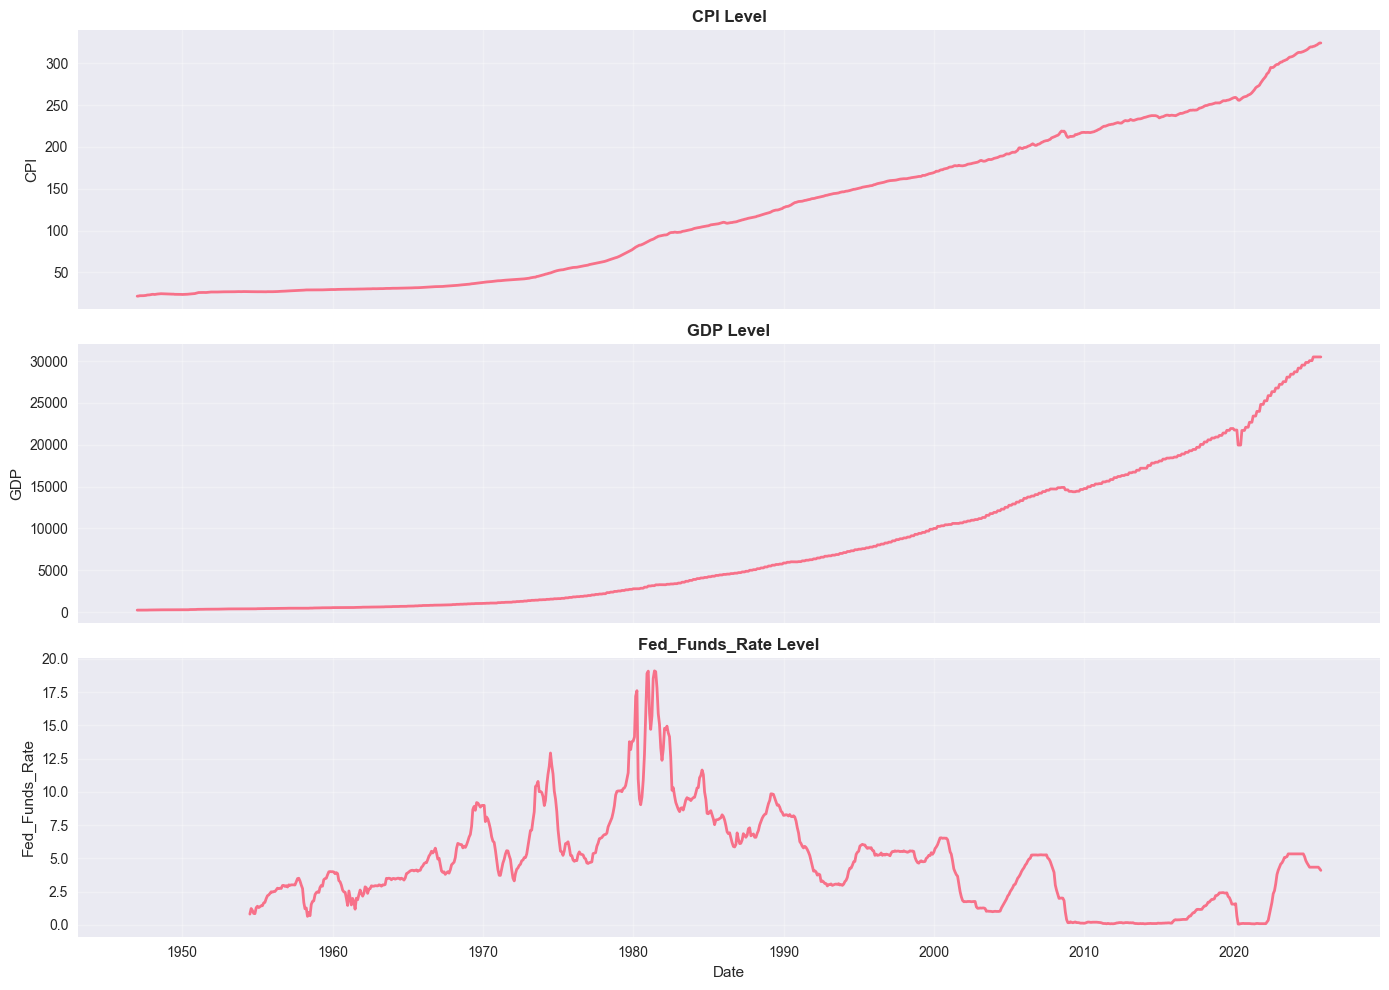

Saved: ../docs/figures/week3/targets_time_series_levels.png


In [34]:
# Time series: levels for CPI, GDP, Fed Funds
targets = ['CPI', 'GDP', 'Fed_Funds_Rate']

fig, axes = plt.subplots(len(targets), 1, figsize=(14, 10), sharex=True)

for i, col in enumerate(targets):
    axes[i].plot(df.index, df[col], lw=2)
    axes[i].set_title(f'{col} Level', fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].grid(alpha=0.3)

axes[-1].set_xlabel('Date')
plt.tight_layout()
fname_levels = f'{output_dir}/targets_time_series_levels.png'
plt.savefig(fname_levels, dpi=300, bbox_inches='tight')
plt.show()

print('Saved:', fname_levels)

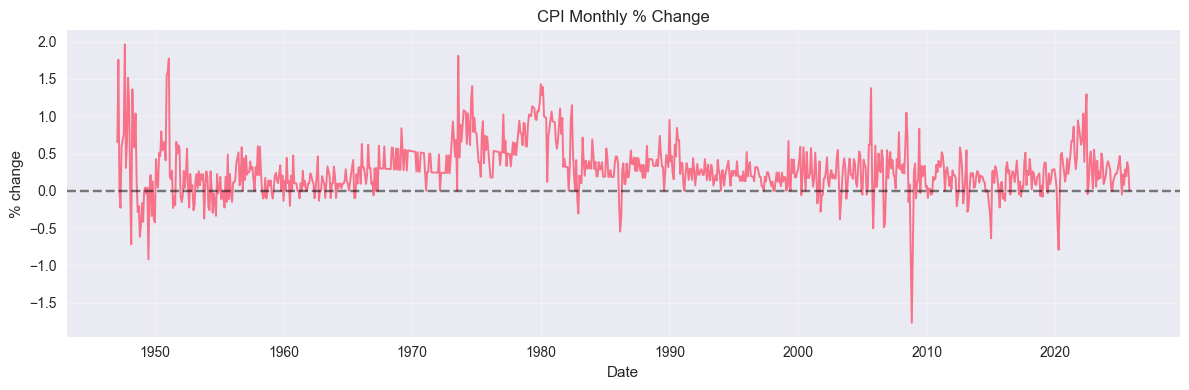

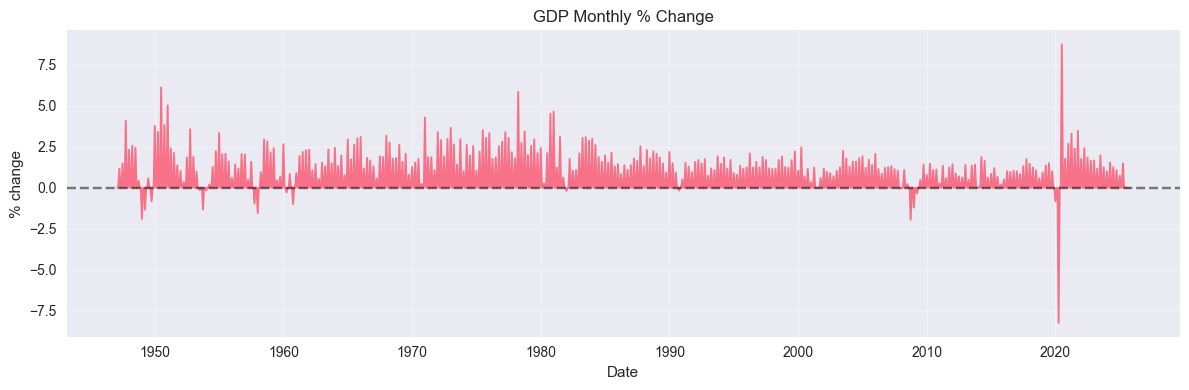

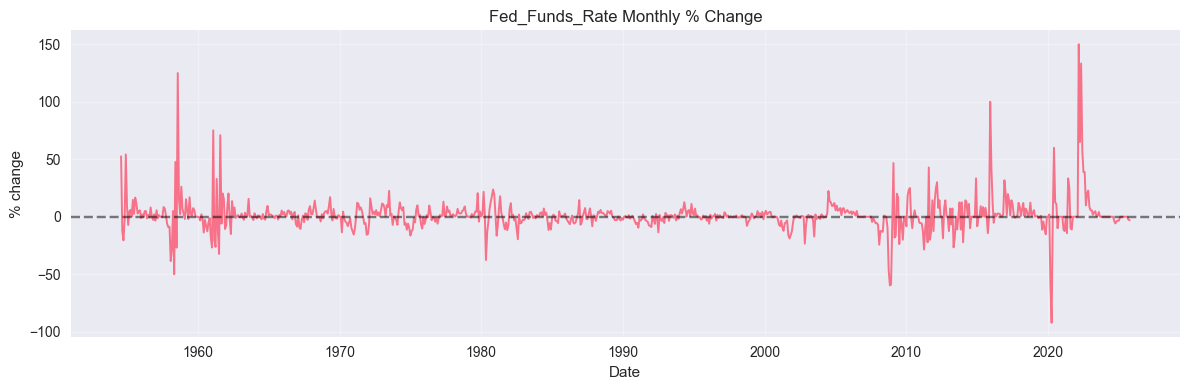

In [35]:
# Monthly % change

df_pct = df[targets].pct_change() * 100

for col in targets:
    plt.figure(figsize=(12,4))
    plt.plot(df_pct.index, df_pct[col], lw=1.4)
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.title(f'{col} Monthly % Change')
    plt.ylabel('% change')
    plt.xlabel('Date')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{col}_pct_change.png', dpi=300)
    plt.show()


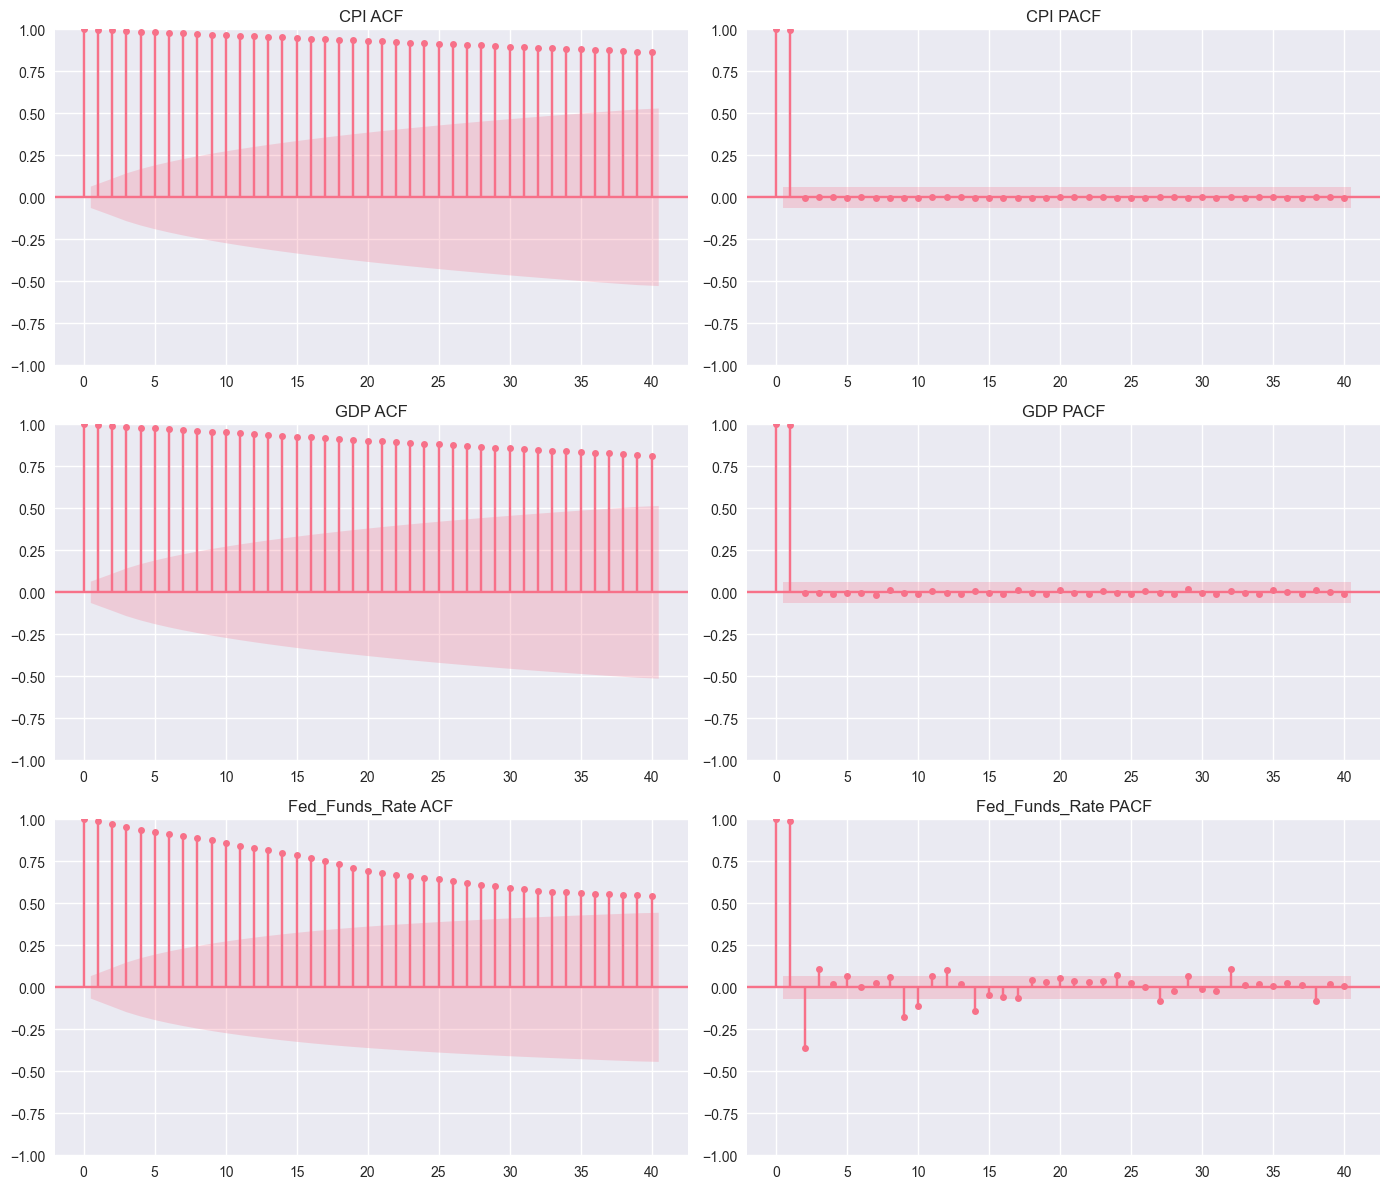

Saved: ../docs/figures/week3/targets_acf_pacf.png


In [40]:
# ACF/PACF graphs
max_lags = 40

fig, axes = plt.subplots(len(targets), 2, figsize=(14, 4 * len(targets)))

for i, col in enumerate(targets):
    series = df[col].dropna()
    
    # ACF
    plot_acf(series, lags=max_lags, ax=axes[i, 0], alpha=0.05)
    axes[i, 0].set_title(f'{col} ACF')
    
    # PACF
    plot_pacf(series, lags=max_lags, ax=axes[i, 1], alpha=0.05, method='ywm')
    axes[i, 1].set_title(f'{col} PACF')


plt.tight_layout()
acf_pacf_graph_naming = f'{output_dir}/targets_acf_pacf.png'
plt.savefig(acf_pacf_graph_naming, dpi=300, bbox_inches='tight')
plt.show()


print('Saved:', acf_pacf_graph_naming)

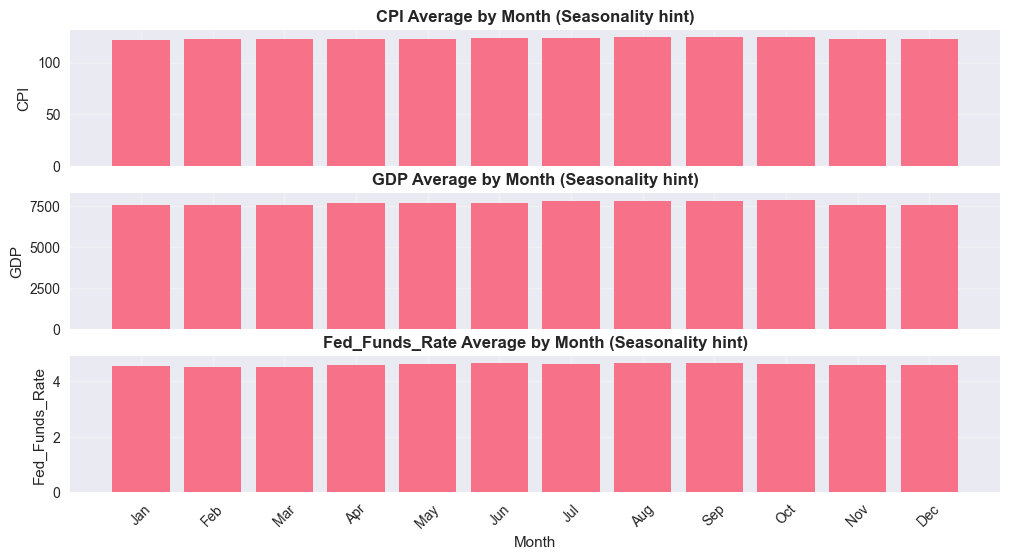

Saved: ../docs/figures/week3/targets_monthly_seasonality.png


In [37]:
# --- Seasonality: average by calendar month ---
df_season = df.copy()
df_season['month'] = df_season.index.month

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(len(targets), sharex=True)

for i, col in enumerate(targets):
    monthly_avg = df_season.groupby('month')[col].mean()
    axes[i].bar(monthly_avg.index, monthly_avg.values)
    axes[i].set_title(f'{col} Average by Month (Seasonality hint)', fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(month_names, rotation=45)
    axes[i].grid(alpha=0.3)

axes[-1].set_xlabel('Month')
seasonality_graph_naming = f'{output_dir}/targets_monthly_seasonality.png'
plt.savefig(seasonality_graph_naming, dpi=300, bbox_inches='tight')
plt.show()

print('Saved:', seasonality_graph_naming)

Aligned shape for correlation: (856, 5)


,CPI,GDP,Fed_Funds_Rate,Unemployment,Nonfarm_Payrolls
date,,,,,
1954-07-01,26.86,390.996,0.80,5.8,48835.0
1954-08-01,26.85,390.996,1.22,6.0,48826.0
1954-09-01,26.81,390.996,1.07,6.1,48886.0
1954-10-01,26.72,399.734,0.85,5.7,48942.0
1954-11-01,26.78,399.734,0.83,5.3,49180.0


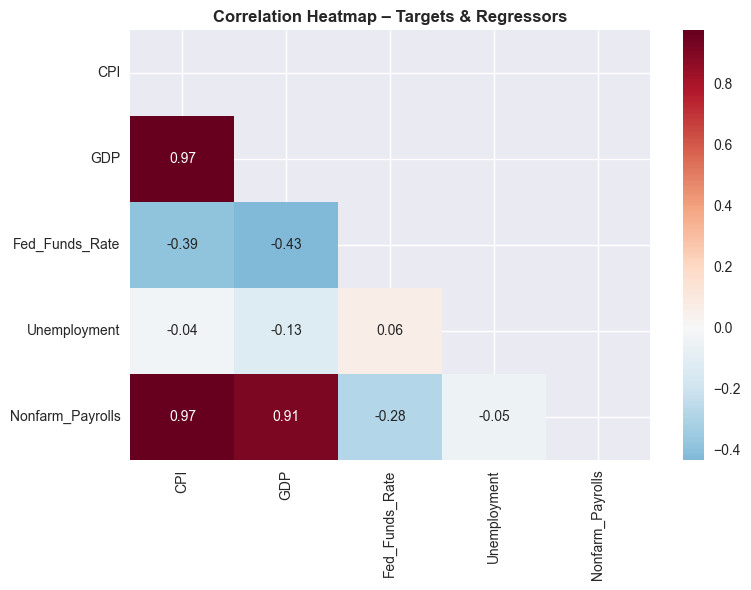

Saved: ../docs/figures/week3/targets_correlation_heatmap.png


In [38]:
# --- Correlation analysis (after alignment) ---
# Assume regressors: Unemployment, Nonfarm_Payrolls (adjust if names differ)
cols_for_corr = ['CPI', 'GDP', 'Fed_Funds_Rate', 'Unemployment', 'Nonfarm_Payrolls']

df_corr = df[cols_for_corr].dropna()
print('Aligned shape for correlation:', df_corr.shape)
display(df_corr.head())

corr_mat = df_corr.corr()

plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Correlation Heatmap – Targets & Regressors', fontweight='bold')
plt.tight_layout()
fname_corr = f'{output_dir}/targets_correlation_heatmap.png'
plt.savefig(fname_corr, dpi=300, bbox_inches='tight')
plt.show()

print('Saved:', fname_corr)

,missing_count,missing_percent
CPI,96,9.21
GDP,96,9.21
Fed_Funds_Rate,186,17.85
Unemployment,108,10.36
Nonfarm_Payrolls,0,0.00


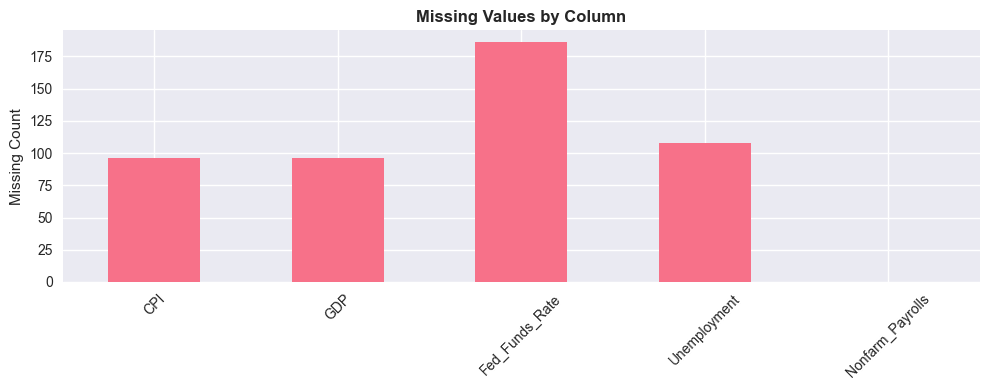

,outlier_count,outlier_percent
CPI,0.0,0.0
GDP,0.0,0.0
Fed_Funds_Rate,12.0,1.4


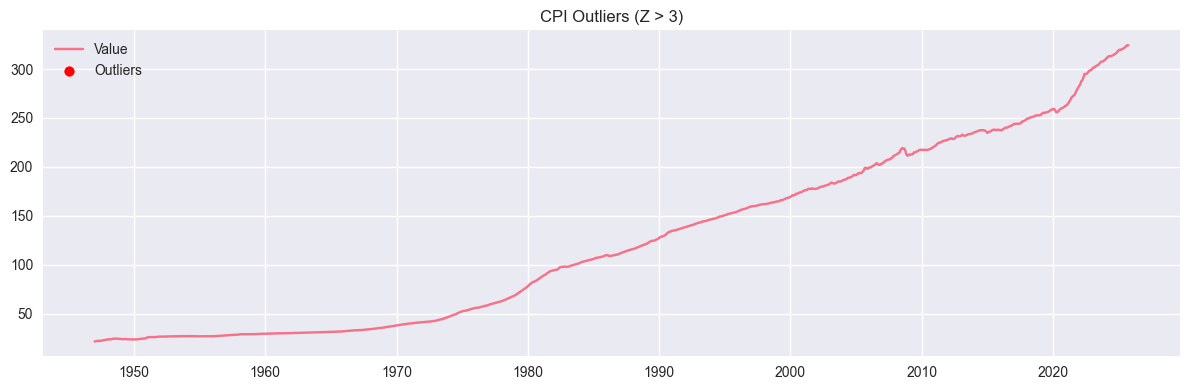

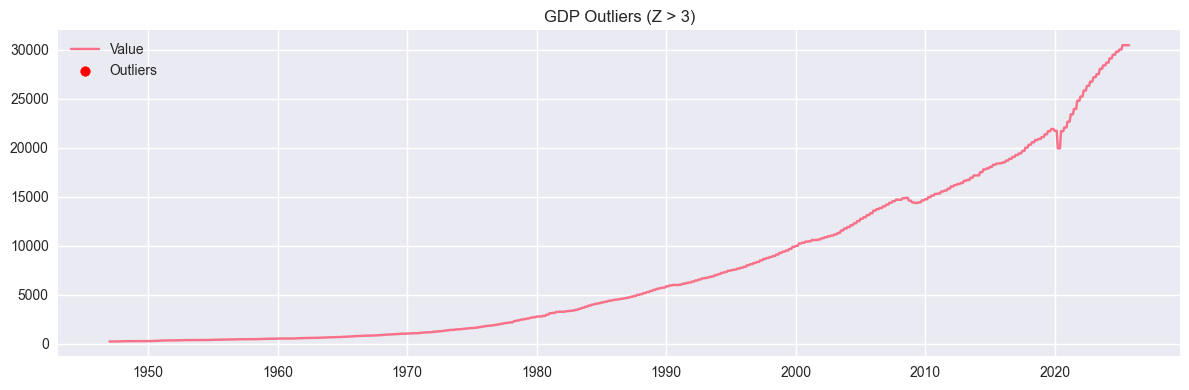

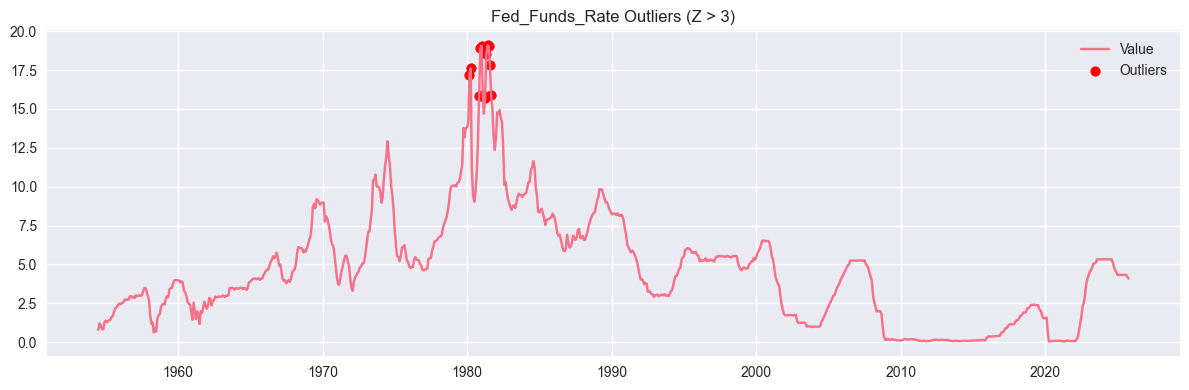

In [39]:
# Dashboard EDA for targets

# Missingness summary table
missing_table = df.isnull().sum().to_frame(name='missing_count')
missing_table['missing_percent'] = (missing_table['missing_count'] / len(df) * 100).round(2)
display(missing_table)

# Missingness bar plot (showing missing values by column)
plt.figure(figsize=(10,4))
missing_table['missing_count'].plot(kind='bar')
plt.title('Missing Values by Column', fontweight='bold')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{output_dir}/missing_values.png', dpi=300)
plt.show()

outlier_table = pd.DataFrame()

for col in ['CPI', 'GDP', 'Fed_Funds_Rate']:
    z = zscore(df[col].dropna())
    outlier_mask = abs(z) > 3
    outlier_table.loc[col, 'outlier_count'] = outlier_mask.sum()
    outlier_table.loc[col, 'outlier_percent'] = round(outlier_mask.mean() * 100, 2)

display(outlier_table)

# Plot each target with red outliers
for col in ['CPI', 'GDP', 'Fed_Funds_Rate']:
    s = df[col].dropna()
    z = zscore(s)
    outliers = abs(z) > 3

    plt.figure(figsize=(12,4))
    plt.plot(s.index, s.values, label='Value')
    plt.scatter(s.index[outliers], s[outliers], color='red', label='Outliers')
    plt.title(f'{col} Outliers (Z > 3)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{col}_outliers.png', dpi=300)
    plt.show()
